# Poisson Regression Models for Time Series Data Sets

In [1]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as dm
import numpy as np
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt

In [2]:
strikes_dataset = sm.datasets.get_rdataset(dataname='StrikeNb', package='Ecdat')

In [3]:
print(strikes_dataset.data)

     strikes   output  time
0          5  0.01517     1
1          4  0.00997     2
2          6  0.01170     3
3         16  0.00473     4
4          5  0.01277     5
..       ...      ...   ...
103        3  0.00134   104
104        4 -0.12810   105
105        6 -0.01538   106
106        2 -0.00703   107
107        3 -0.00003   108

[108 rows x 3 columns]


In [4]:
strikes_data = strikes_dataset.data.copy()
strikes_data_train = strikes_data.query('time<=92')
strikes_data_test = strikes_data.query('time>92').reset_index().drop('index', axis=1)

In [5]:
print('Mean='+str(np.mean(strikes_data_train['strikes'])) + ' Variance='+str(np.var(strikes_data_train['strikes'])))

Mean=5.5 Variance=14.728260869565217


In [6]:
expr = 'strikes ~ output'

In [7]:
y_train, X_train = dmatrices(expr, strikes_data_train, return_type='dataframe')
print(y_train)
print(X_train)

y_test, X_test = dmatrices(expr, strikes_data_test, return_type='dataframe')
print(y_test)
print(X_test)

    strikes
0       5.0
1       4.0
2       6.0
3      16.0
4       5.0
..      ...
87      2.0
88      1.0
89      2.0
90      2.0
91      3.0

[92 rows x 1 columns]
    Intercept   output
0         1.0  0.01517
1         1.0  0.00997
2         1.0  0.01170
3         1.0  0.00473
4         1.0  0.01277
..        ...      ...
87        1.0 -0.12590
88        1.0 -0.12224
89        1.0 -0.10443
90        1.0 -0.08656
91        1.0 -0.06279

[92 rows x 2 columns]
    strikes
0       0.0
1       5.0
2       5.0
3       1.0
4       1.0
5       1.0
6       1.0
7       8.0
8       5.0
9       9.0
10      6.0
11      3.0
12      4.0
13      6.0
14      2.0
15      3.0
    Intercept   output
0         1.0 -0.06034
1         1.0 -0.05790
2         1.0 -0.04919
3         1.0 -0.04494
4         1.0 -0.02700
5         1.0 -0.00601
6         1.0 -0.00693
7         1.0 -0.00528
8         1.0 -0.00155
9         1.0 -0.00700
10        1.0 -0.00157
11        1.0  0.00134
12        1.0 -0.12810
13      

In [8]:
nb2_model = dm.NegativeBinomial(endog=y_train, exog=X_train, loglike_method='nb2')
nb2_model_results = nb2_model.fit(maxiter=100)
print(nb2_model_results.summary())

Optimization terminated successfully.
         Current function value: 2.634126
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
                     NegativeBinomial Regression Results                      
Dep. Variable:                strikes   No. Observations:                   92
Model:               NegativeBinomial   Df Residuals:                       90
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 Jun 2021   Pseudo R-squ.:                0.009002
Time:                        16:28:57   Log-Likelihood:                -242.34
converged:                       True   LL-Null:                       -244.54
Covariance Type:            nonrobust   LLR p-value:                   0.03589
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6920      0.073     2

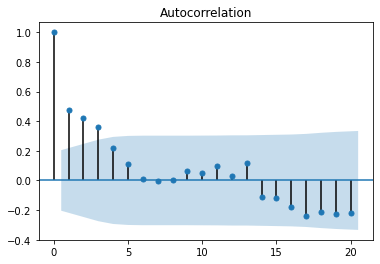

In [9]:
# Нет кода в статье. Только картинка
tsa.plot_acf(nb2_model_results.resid, alpha=0.05)
plt.show()

# Building an Auto-regressive Poisson model

In [10]:
strikes_data['strikes_adj'] = np.maximum(1, strikes_data['strikes'])

In [11]:
def indicator_func(x):
    if x == 0:
        return 1
    else:
        return 0

In [12]:
strikes_data['d'] = strikes_data['strikes'].apply(indicator_func)

In [13]:
strikes_data['ln_strikes_adj_lag1'] = strikes_data['strikes_adj'].shift(1)
strikes_data['ln_strikes_adj_lag2'] = strikes_data['strikes_adj'].shift(2)
strikes_data['ln_strikes_adj_lag3'] = strikes_data['strikes_adj'].shift(3)

strikes_data['d_lag1'] = strikes_data['d'].shift(1)
strikes_data['d_lag2'] = strikes_data['d'].shift(2)
strikes_data['d_lag3'] = strikes_data['d'].shift(3)

In [14]:
strikes_data = strikes_data.dropna()

In [15]:
# Нет кода в статье.
strikes_data['ln_strikes_adj_lag1'] = np.log(strikes_data['ln_strikes_adj_lag1'])

In [16]:
# Нет кода в статье.
strikes_data['ln_strikes_adj_lag2'] = np.log(strikes_data['ln_strikes_adj_lag2'])

In [17]:
# Нет кода в статье.
strikes_data['ln_strikes_adj_lag3'] = np.log(strikes_data['ln_strikes_adj_lag3'])

In [18]:
print(strikes_data)

     strikes   output  time  strikes_adj  d  ln_strikes_adj_lag1  \
3         16  0.00473     4           16  0             1.791759   
4          5  0.01277     5            5  0             2.772589   
5          8  0.01138     6            8  0             1.609438   
6          8  0.00424     7            8  0             2.079442   
7          9 -0.00687     8            9  0             2.079442   
..       ...      ...   ...          ... ..                  ...   
103        3  0.00134   104            3  0             1.791759   
104        4 -0.12810   105            4  0             1.098612   
105        6 -0.01538   106            6  0             1.386294   
106        2 -0.00703   107            2  0             1.791759   
107        3 -0.00003   108            3  0             0.693147   

     ln_strikes_adj_lag2  ln_strikes_adj_lag3  d_lag1  d_lag2  d_lag3  
3               1.386294             1.609438     0.0     0.0     0.0  
4               1.791759             1.

In [19]:
strikes_data_train=strikes_data.query('time<=92')
strikes_data_test=strikes_data.query('time>92').reset_index().drop('index', axis=1)

In [20]:
expr = 'strikes ~ output + ln_strikes_adj_lag1 + ln_strikes_adj_lag2 + ln_strikes_adj_lag3 + d_lag1 + d_lag2 + d_lag3'

In [21]:
y_train, X_train = dmatrices(expr, strikes_data_train, return_type='dataframe')
print(y_train)
print(X_train)

    strikes
3      16.0
4       5.0
5       8.0
6       8.0
7       9.0
..      ...
87      2.0
88      1.0
89      2.0
90      2.0
91      3.0

[89 rows x 1 columns]
    Intercept   output  ln_strikes_adj_lag1  ln_strikes_adj_lag2  \
3         1.0  0.00473             1.791759             1.386294   
4         1.0  0.01277             2.772589             1.791759   
5         1.0  0.01138             1.609438             2.772589   
6         1.0  0.00424             2.079442             1.609438   
7         1.0 -0.00687             2.079442             2.079442   
..        ...      ...                  ...                  ...   
87        1.0 -0.12590             1.386294             1.098612   
88        1.0 -0.12224             0.693147             1.386294   
89        1.0 -0.10443             0.000000             0.693147   
90        1.0 -0.08656             0.693147             0.000000   
91        1.0 -0.06279             0.693147             0.693147   

    ln_strikes_a

In [22]:
poisson_model = dm.Poisson(endog=y_train, exog=X_train)
poisson_model_results = poisson_model.fit(maxiter=100)
print(poisson_model_results.summary())

Optimization terminated successfully.
         Current function value: 2.566112
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                strikes   No. Observations:                   89
Model:                        Poisson   Df Residuals:                       81
Method:                           MLE   Df Model:                            7
Date:                Sat, 26 Jun 2021   Pseudo R-squ.:                  0.1569
Time:                        16:28:58   Log-Likelihood:                -228.38
converged:                       True   LL-Null:                       -270.90
Covariance Type:            nonrobust   LLR p-value:                 1.295e-15
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7038      0.154      4.573      0.000       0.402       1.005
ou

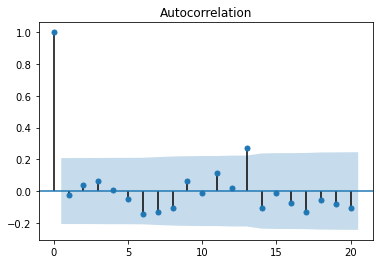

In [23]:
tsa.plot_acf(poisson_model_results.resid, alpha=0.05)
plt.show()

In [24]:
y_test, X_test = dmatrices(expr, strikes_data_test, return_type='dataframe')
print(y_test)
print(X_test)

    strikes
0       0.0
1       5.0
2       5.0
3       1.0
4       1.0
5       1.0
6       1.0
7       8.0
8       5.0
9       9.0
10      6.0
11      3.0
12      4.0
13      6.0
14      2.0
15      3.0
    Intercept   output  ln_strikes_adj_lag1  ln_strikes_adj_lag2  \
0         1.0 -0.06034             1.098612             0.693147   
1         1.0 -0.05790             0.000000             1.098612   
2         1.0 -0.04919             1.609438             0.000000   
3         1.0 -0.04494             1.609438             1.609438   
4         1.0 -0.02700             0.000000             1.609438   
5         1.0 -0.00601             0.000000             0.000000   
6         1.0 -0.00693             0.000000             0.000000   
7         1.0 -0.00528             0.000000             0.000000   
8         1.0 -0.00155             2.079442             0.000000   
9         1.0 -0.00700             1.609438             2.079442   
10        1.0 -0.00157             2.197225     

In [25]:
poisson_predictions = poisson_model_results.predict(X_test)

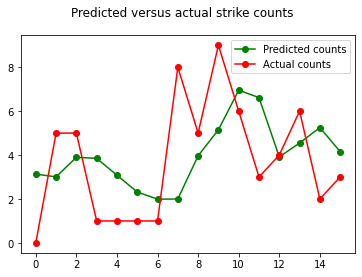

In [26]:
predicted_counts=poisson_predictions
actual_counts = y_test['strikes']
fig = plt.figure()
fig.suptitle('Predicted versus actual strike counts')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()